In [1]:
import pennylane as qml
import pennylane.numpy as pnp
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from pprint import pprint
cwd = os.getcwd()
print(cwd)

In [2]:
h2_results = '20250112-122032.json'

In [3]:
with open(os.path.join(cwd, h2_results)) as f:
    h2_results = json.load(f)

E_fci = -1.136189454088
Min_Energy = E_fci

In [4]:
print(h2_results.keys())
pprint(h2_results['op_list'])
print(len(h2_results['op_list']))
# count the number of parameters
h2_results_num_parameters = 0
for c in h2_results['op_list']:
    if c[2] != None:
        h2_results_num_parameters = h2_results_num_parameters + len(c[2])
print()
print(h2_results_num_parameters)

dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
[['Rot', [2], [1.2334004784501968, 1.619214814498129, -0.20702061131637745]],
 ['Rot', [3], [0.3025737822877723, 1.906222138589106, -0.6959451447648052]],
 ['Rot', [0], [-0.6177292180109472, 0.2618860499101079, -0.8956380280234273]],
 ['CNOT', [3, 2], None],
 ['Rot', [2], [-0.14119790911560076, 1.457081882639712, 2.236184799618754]],
 ['CNOT', [3, 1], None],
 ['CNOT', [0, 1], None],
 ['CNOT', [3, 1], None],
 ['CNOT', [1, 2], None],
 ['Rot', [1], [-0.8757457617814262, -0.1713179792568089, -1.636755684439915]],
 ['CNOT', [2, 0], None],
 ['CNOT', [0, 3], None],
 ['CNOT', [3, 1], None],
 ['CNOT', [2, 3], None],
 ['Rot', [1], [0.6863501886136227, 1.6673100315583713, -0.1597281386126563]],
 ['Rot', [2], [-3.1787394660011654, 0.2911143309529912, 1.7202863348328856]],
 ['CNOT', [2, 3], None],
 ['Rot', [3], [0.9795073957362164, -1.5820324489827227, -1.5290462522275436]],
 ['CNOT', [2, 1], None],
 ['CNO

In [5]:
import pennylane as qml

num_qubits = 4
dev = qml.device("default.qubit", wires=num_qubits)
@qml.qnode(dev)
def circuit():
    for op in h2_results['op_list']:
        gate, wires, params = op
        if gate == "Rot":
            qml.Rot(*params, wires=wires[0]) 
        elif gate == "CNOT":
            qml.CNOT(wires=wires)  
    return qml.state()

with qml.tape.QuantumTape() as tape:
    for op in h2_results['op_list']:
        gate, wires, params = op
        if gate == "Rot":
            qml.Rot(*params, wires=wires[0])
        elif gate == "CNOT":
            qml.CNOT(wires=wires)
print(tape.draw())


2: ──Rot─╭X──Rot───────╭X─╭●─────────╭●────Rot─╭●──────╭●─────────╭X──Rot──────┤  
3: ──Rot─╰●─╭●──────╭●─│──│────╭X─╭●─╰X────────╰X──Rot─│──╭●──Rot─│──╭●────────┤  
0: ──Rot────│────╭●─│──│──╰X───╰●─│────────────────────│──│───────╰●─╰X────Rot─┤  
1: ─────────╰X───╰X─╰X─╰●──Rot────╰X──Rot──────────────╰X─╰X──Rot──────────────┤  


In [13]:
h2_results_search_rewards = [s[2] for s in h2_results['search_reward_list']]
h2_results_fine_tune_loss = h2_results['fine_tune_loss']

[0.2820455866345558, 0.391923636834817, 0.30434253778285514, 0.14993056260226686, 0.08726426100088358, 0.1491638957720225, 0.2404377271016151, 0.40731877818803325, 0.03227658228877896, 0.38428045099759023, 0.09663966174471564, 0.24485922863116835, 0.02675988208087808, 0.11198667268464316, 0.21846485385140546, 0.21046502315228904, 0.27167569007876724, 0.02645294013610187, 0.038834327240496055, 0.34105857467756084, 0.3545075034929411, 0.11919824707665225, 0.339420569909507, 0.36919409129259, 0.3084108767516742, 0.010792551919551224, 0.349343931762897, 0.04827337483005402, 0.06548590435841259, 0.2497055783187546]


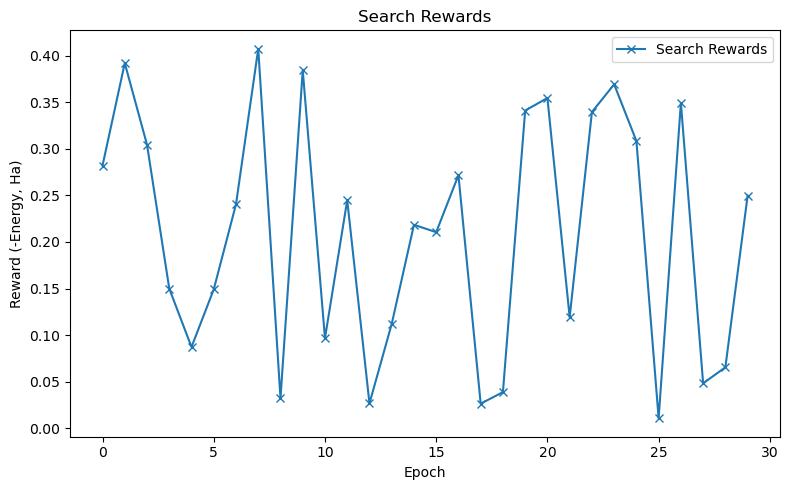

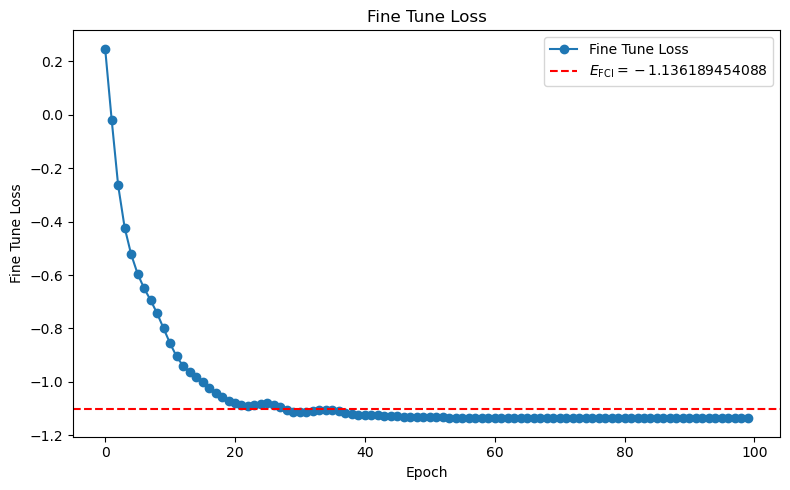

In [19]:
#Search Rewards
plt.figure(figsize=(8, 5))
plt.plot(list(range(len(h2_results_search_rewards))), h2_results_search_rewards, marker='x', label='Search Rewards')
plt.xlabel('Epoch')
plt.ylabel('Reward (-Energy, Ha)')
plt.title("Search Rewards")
plt.legend()
plt.tight_layout()
plt.show()

#Fine Tune Loss 
plt.figure(figsize=(8, 5))
plt.plot(list(range(len(h2_results_fine_tune_loss))), h2_results_fine_tune_loss, marker='o', label='Fine Tune Loss')
plt.axhline(y=-1.1, color='r', linestyle='--', label=r"$E_{\text{FCI}} = -1.136189454088$")
plt.xlabel('Epoch')
plt.ylabel('Fine Tune Loss')
plt.title("Fine Tune Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
print("Final Energy: ",  h2_results_fine_tune_loss[-1])

Final Energy:  -1.1361428869362153
